# Fraud Detection

### Business Description

Fraud detection is a critical component in safeguarding businesses and industries against deceptive activities. As organizations increasingly rely on digital transactions and data-driven operations, the need for robust fraud detection mechanisms becomes crucial.

**What is Fraud Detection used for?**

Fraud detection serves as a proactive measure to identify and mitigate instances of deceit, unauthorized access, or malicious activities within a system. The primary goal is to ensure the integrity of transactions, protect sensitive information, and maintain the trust of stakeholders.

**The Importance of Fraud Detection**

The repercussions of fraud extend beyond financial losses, including damage to reputation, deterioration of customer trust, and potential legal ramifications. By implementing data science techniques, businesses can enhance their ability to detect and prevent fraudulent activities, thereby strengthening their security posture and preserving the reliability of their operations.

**Challenges of Fraud Detection**

Despite its significance, fraud detection presents multifaceted challenges. The always-changing game of fraudulent tactics, the substantial volume of data to analyze, and the challenge presented by the balance between false positives and false negatives constitute ongoing challenges. This project aims to navigate these hurdles with data science approaches in order to create a robust fraud detection system.

### Business Problem 

**The Project**

In this project, we will use a [Kaggle Dataset](https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example) for Fraud Detection using Machine Learning.

**Objectives: developing a fraud detection model**

The objective is constructing a defense mechanism for the financial institution anchored in data science techniques to fortify the security infrastructure and elevate the precision of decision-making processes.

## 0. Imports

### 0.1. Libraries

In [1]:
### Data manipulation 
import pandas                   as pd
import numpy                    as np

### Data visualization
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import graphviz

### Machine learning 

import sklearn

from sklearn.model_selection    import train_test_split, RandomizedSearchCV
from sklearn.metrics            import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics            import roc_curve, roc_auc_score
from sklearn.metrics            import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing      import RobustScaler, LabelEncoder
from sklearn.ensemble           import RandomForestClassifier
from sklearn.linear_model       import LogisticRegression

from imblearn.over_sampling     import RandomOverSampler, SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


### Other libraries

import inflection
import warnings
import lxml

### 0.2. Settings

In [2]:
### Ignoring warnings
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### Visualization Settings
mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

sns.set_palette('YlOrBr_r')

### 0.3. Functions

In [3]:
##### Functions

def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.

    Args:
        df: the DataFrame we want to know more about.
    
    Returns: a text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {:,}'.format(df.shape[0]))
    print('Number of columns: {:,}'.format(df.shape[1]))

    return None

def set_image(title, xlabel, ylabel, rotation=0):
    """
    Summary: This function sets the image configuration.

    Args:
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.

    Returns: None
    """

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=rotation)
    plt.tick_params(left=False, bottom=False);

    return None


### 0.4. Loading data

In [4]:
# Importing the dataset as a Raw DataFrame
df_raw = pd.read_csv('../data/raw/fraud_dataset_example.csv')

# Copying the dataset to work with `df`
df = df_raw.copy()

## 1. Data description

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


### 1.1. Data Dimensions

In [6]:
df_shape(df)

Number of rows: 101,613
Number of columns: 11


### 1.2. Columns

In [7]:
df.columns.to_list()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

| Feature Name | Description |
|---|---|
| `step` | unit of time (1 hour) |
| `type` | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. |
| `amount` | transaction amount in local currency. |
| `nameOrig` | transaction originator |
| `oldbalanceOrg` | initial balance (before transaction) |
| `newbalanceOrig` | new balance (after transaction) |
| `nameDest` | transaction recipient |
| `oldbalanceDest` | initial balance before transaction. |
| `newbalanceDest` | new balance after transaction. |
| `isFraud` | Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out. |
| `isFlaggedFraud` | An illegal attempt to transfer massive amount of money in a single transaction. |

### 1.3. Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### 1.4. Describing Data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,101613.000,8.523,1.821,1.000,8.000,9.000,10.000,10.000
amount,101613.000,174090.069,345019.899,0.320,10016.590,53385.410,212498.400,10000000.000
oldbalanceOrg,101613.000,907175.257,2829575.284,0.000,0.000,20190.470,194715.000,38939424.030
newbalanceOrig,101613.000,923499.247,2867318.706,0.000,0.000,0.000,219217.760,38946233.020
oldbalanceDest,101613.000,881042.797,2399949.057,0.000,0.000,21058.000,591921.700,34008736.980
newbalanceDest,101613.000,1183998.099,2797761.080,0.000,0.000,51783.430,1063121.640,38946233.020
isFraud,101613.000,0.001,0.034,0.000,0.000,0.000,0.000,1.000
isFlaggedFraud,101613.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### 1.5. Checking NaN

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## 2. Data Exploration and Preprocessing

### 2.1. Renaming Columns

In [11]:
# Renaming columns to snake_case style

old_columns = df.columns.tolist()

snake_case = lambda x: inflection.underscore(x)

new_columns = list(map(snake_case, old_columns))

df.columns = new_columns

df.columns.tolist()

['step',
 'type',
 'amount',
 'name_orig',
 'oldbalance_org',
 'newbalance_orig',
 'name_dest',
 'oldbalance_dest',
 'newbalance_dest',
 'is_fraud',
 'is_flagged_fraud']

In [12]:
df.rename(columns={
    'is_fraud': 'fraud',
    'is_flagged_fraud': 'flagged_fraud',
    'oldbalance_org': 'oldbalance_orig',
    }, inplace=True)

df.head()

,step,type,amount,name_orig,oldbalance_orig,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,fraud,flagged_fraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


## 3. Exploratory Data Analysis

In [13]:
df.sort_values('amount', ascending=False).head()

,step,type,amount,name_orig,oldbalance_orig,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,fraud,flagged_fraud
4441,4,CASH_OUT,10000000.000,C351297720,10000000.000,0.000,C766681183,0.000,9941904.210,1,0
4440,4,TRANSFER,10000000.000,C7162498,12930418.440,2930418.440,C945327594,0.000,0.000,1,0
84416,10,TRANSFER,6419835.270,C890128330,31784.000,0.000,C1192472312,0.000,6691744.850,0,0
66040,9,TRANSFER,6072832.270,C2022065686,1344.000,0.000,C460989529,162174.090,9174785.390,0,0
16720,8,TRANSFER,5677662.290,C293394374,0.000,0.000,C1856036778,8427389.990,13688613.940,0,0


### 3.1. Density of Amount of Money on Transactions

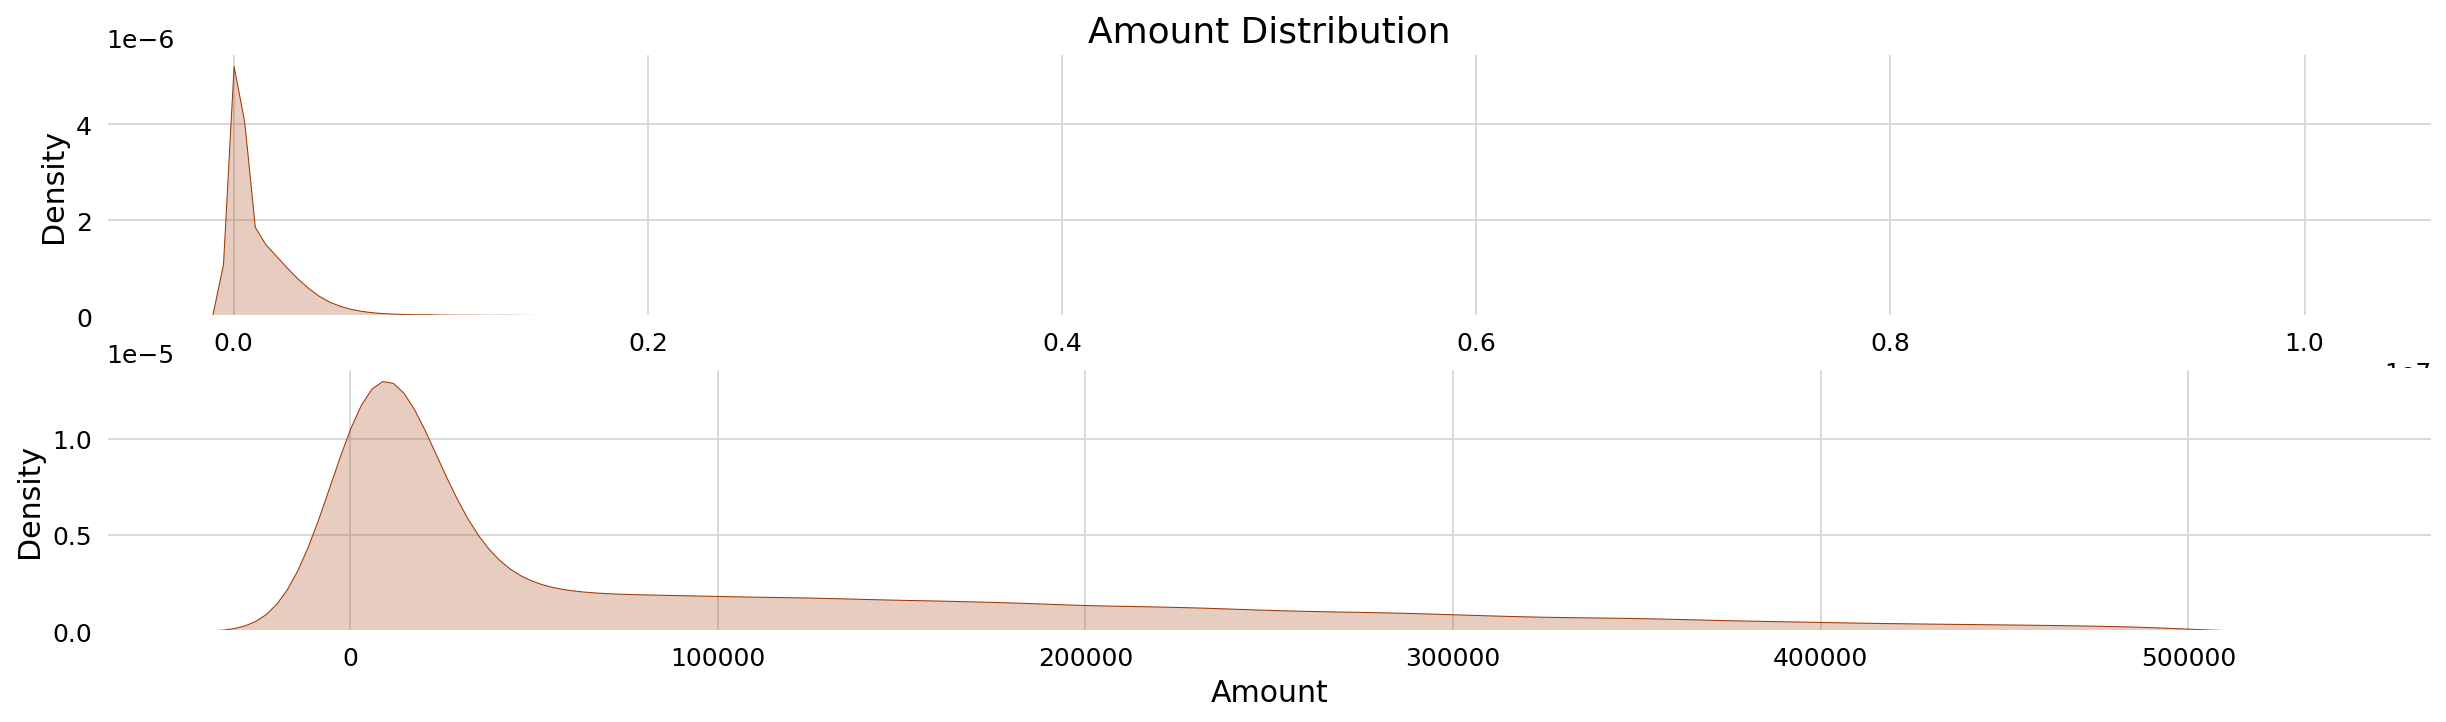

In [14]:
# First plot
plt.subplot(2, 1, 1)
sns.kdeplot(data=df, x='amount', shade=True)
set_image('Amount Distribution', None, 'Density')

# Data Manipulation
aux = df.loc[df['amount'] < 500000]

# Second Plot
plt.subplot(2, 1, 2)
sns.kdeplot(data=aux, x='amount', shade=True)
set_image(None, 'Amount', 'Density')

### 3.2. Step (hour) Distribution

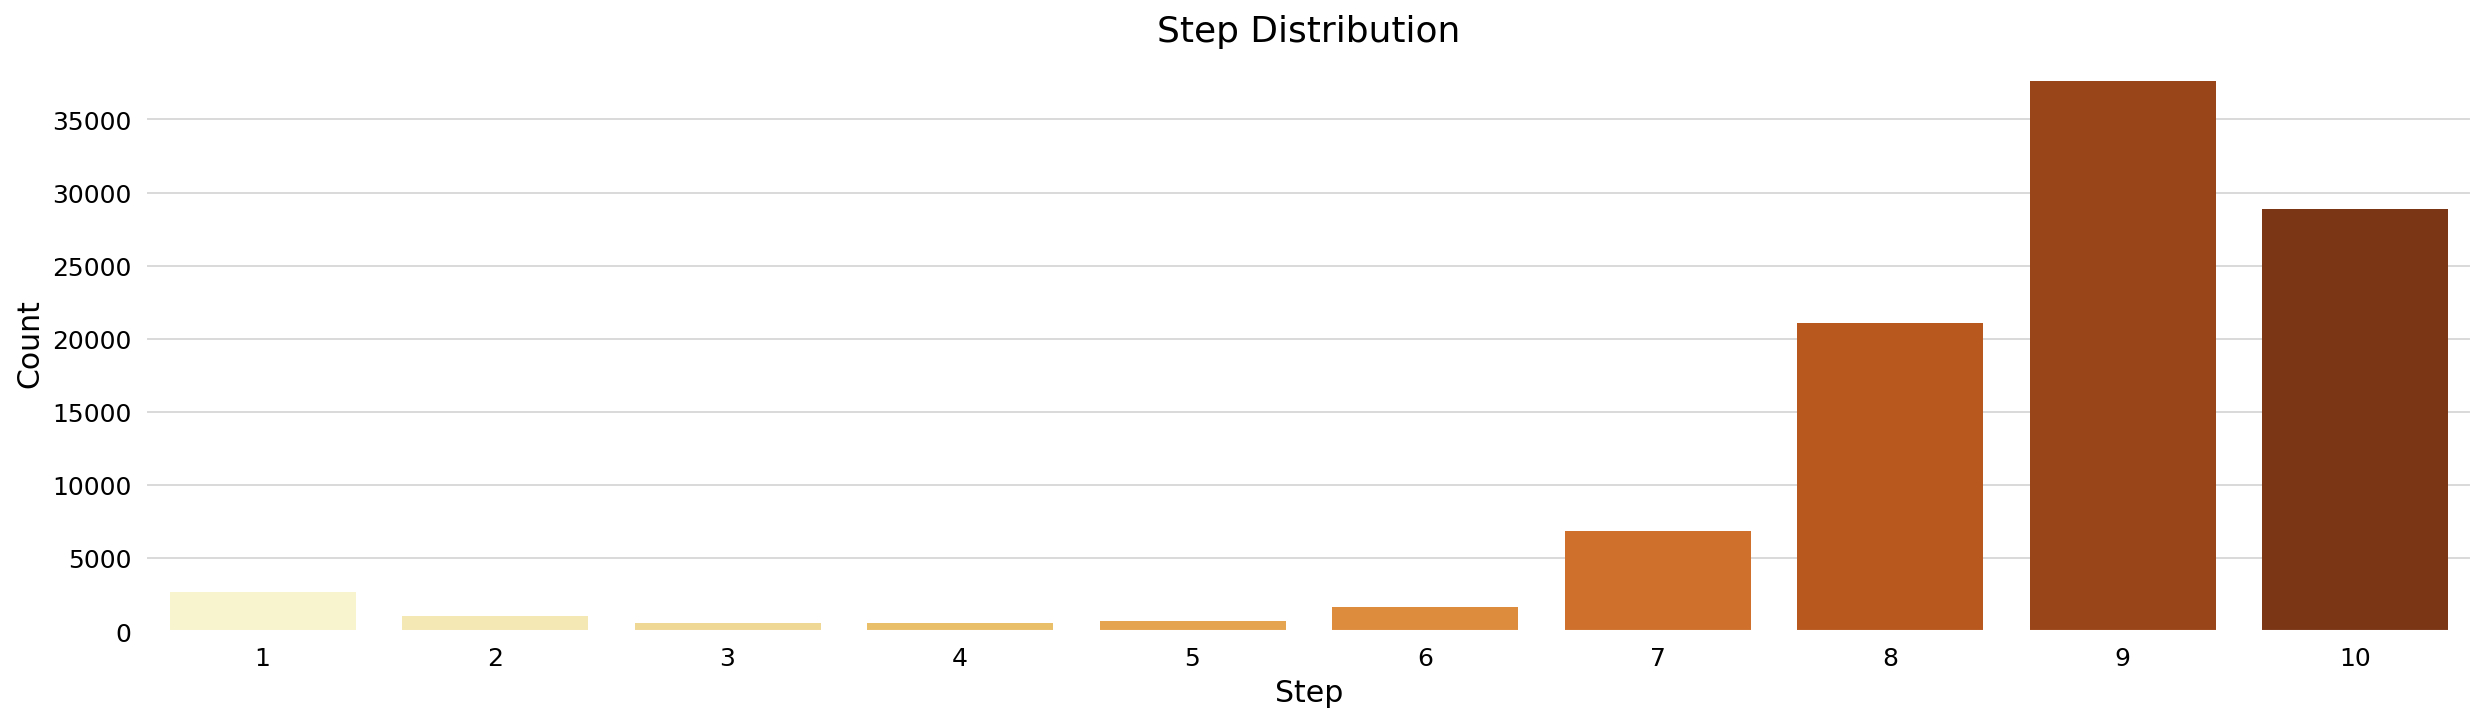

In [15]:
# Step Count
sns.countplot(data=df, x='step', palette='YlOrBr')
# Settings
set_image('Step Distribution', 'Step', 'Count')

### 3.3. Type of Payments Distribution

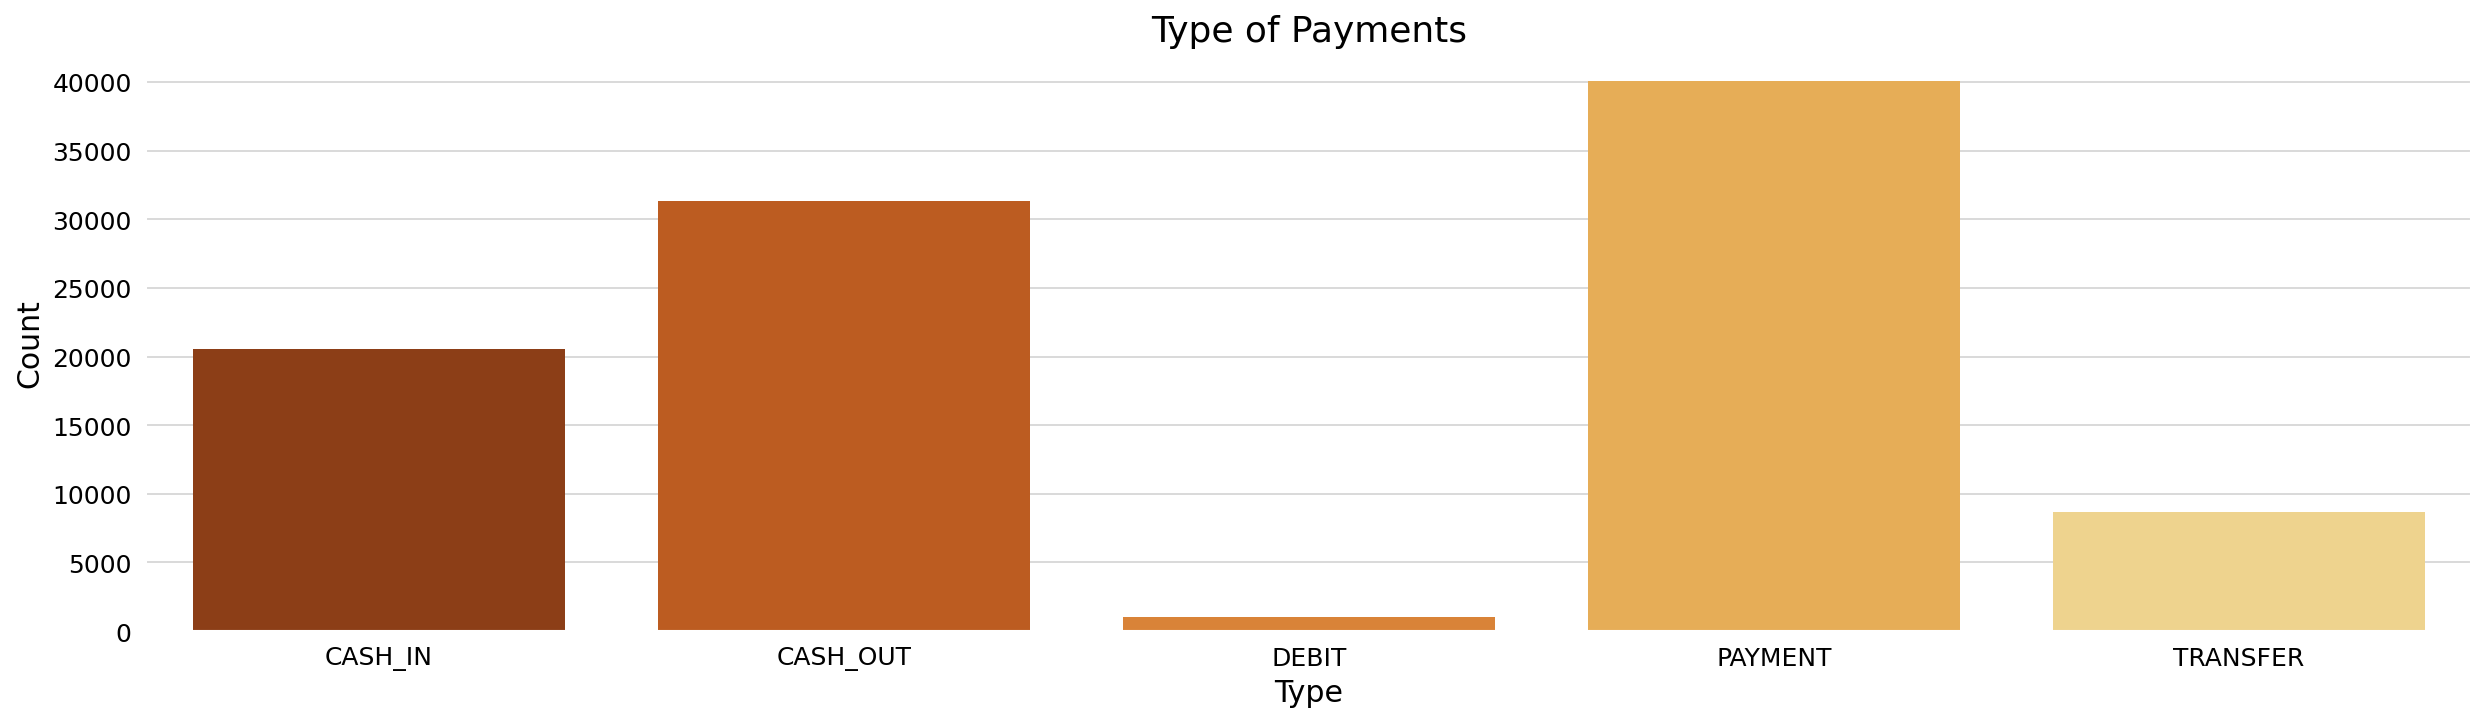

In [16]:
# Countplot on Type of Payments
sns.countplot(data=df, x='type', order=['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])
# Settings
set_image('Type of Payments', 'Type', 'Count')

### 3.4. Amount of Money per Type of Payments

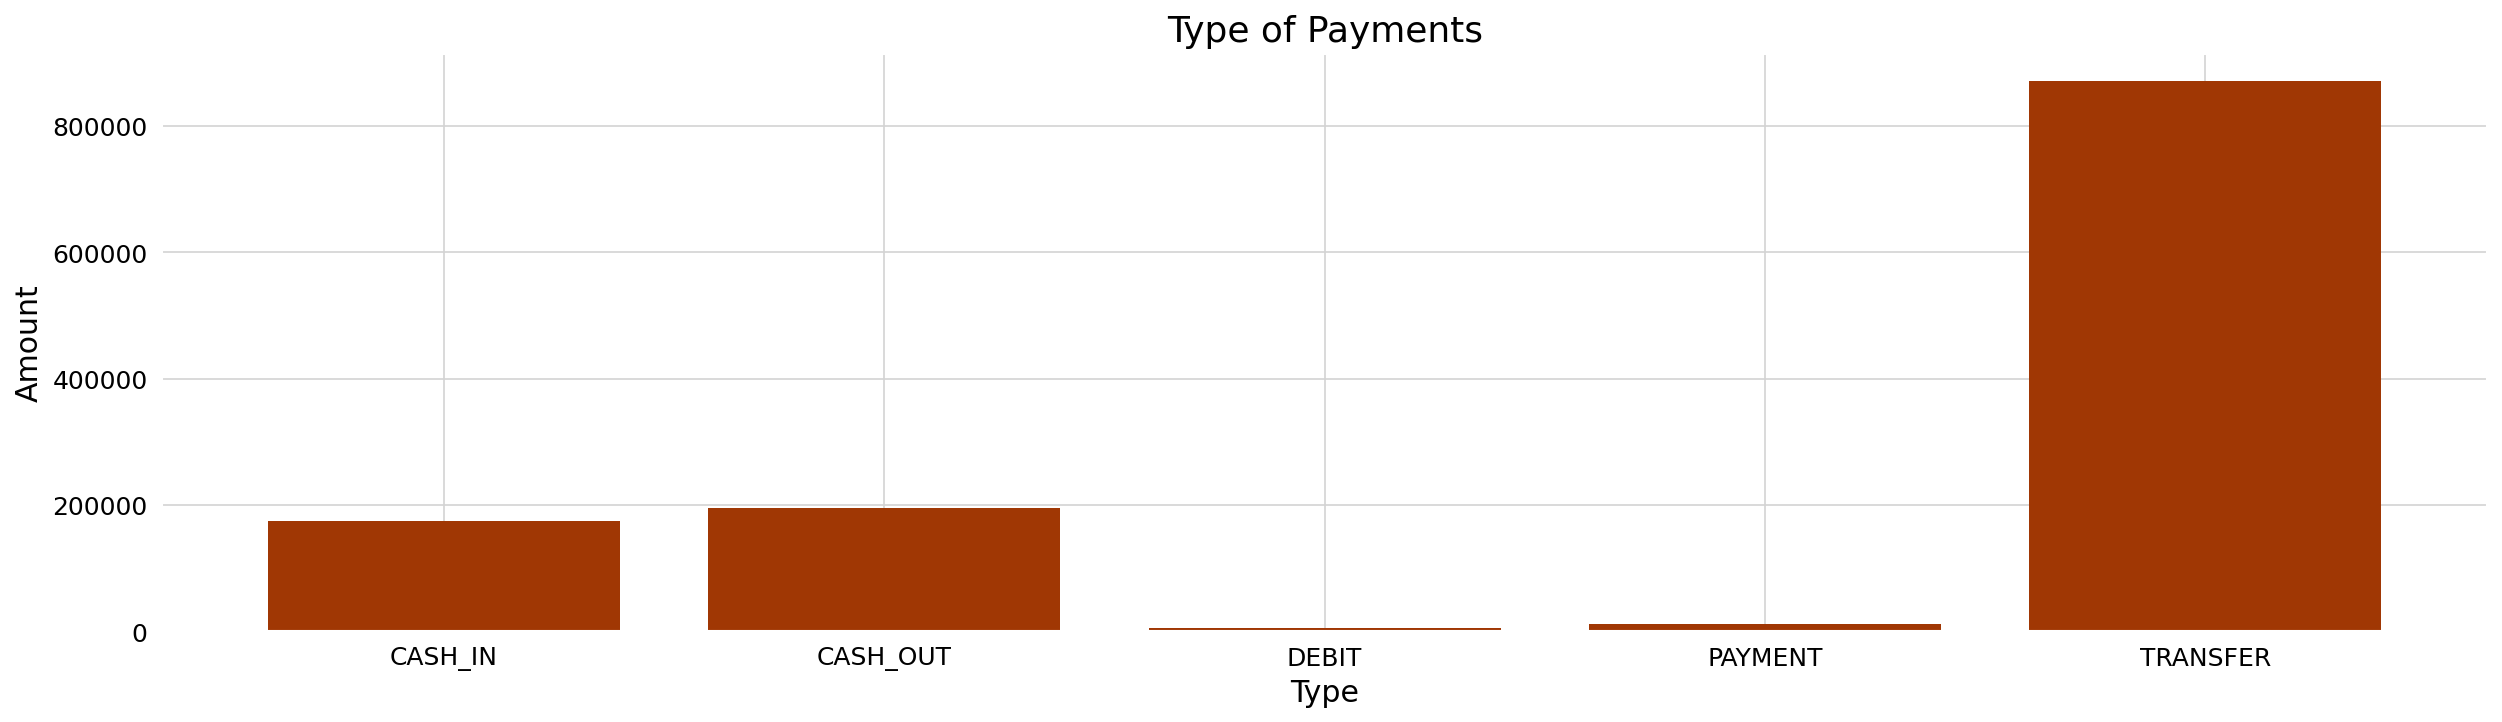

In [17]:
# Manipulation on Type of Payments and Amount
aux = df[['type', 'amount']].groupby(['type']).mean().reset_index()

# Plot
plt.bar(data=aux, x='type', height='amount')

# Settings
set_image('Type of Payments', 'Type', 'Amount')

### 3.5. The Amount of Money on Frauds

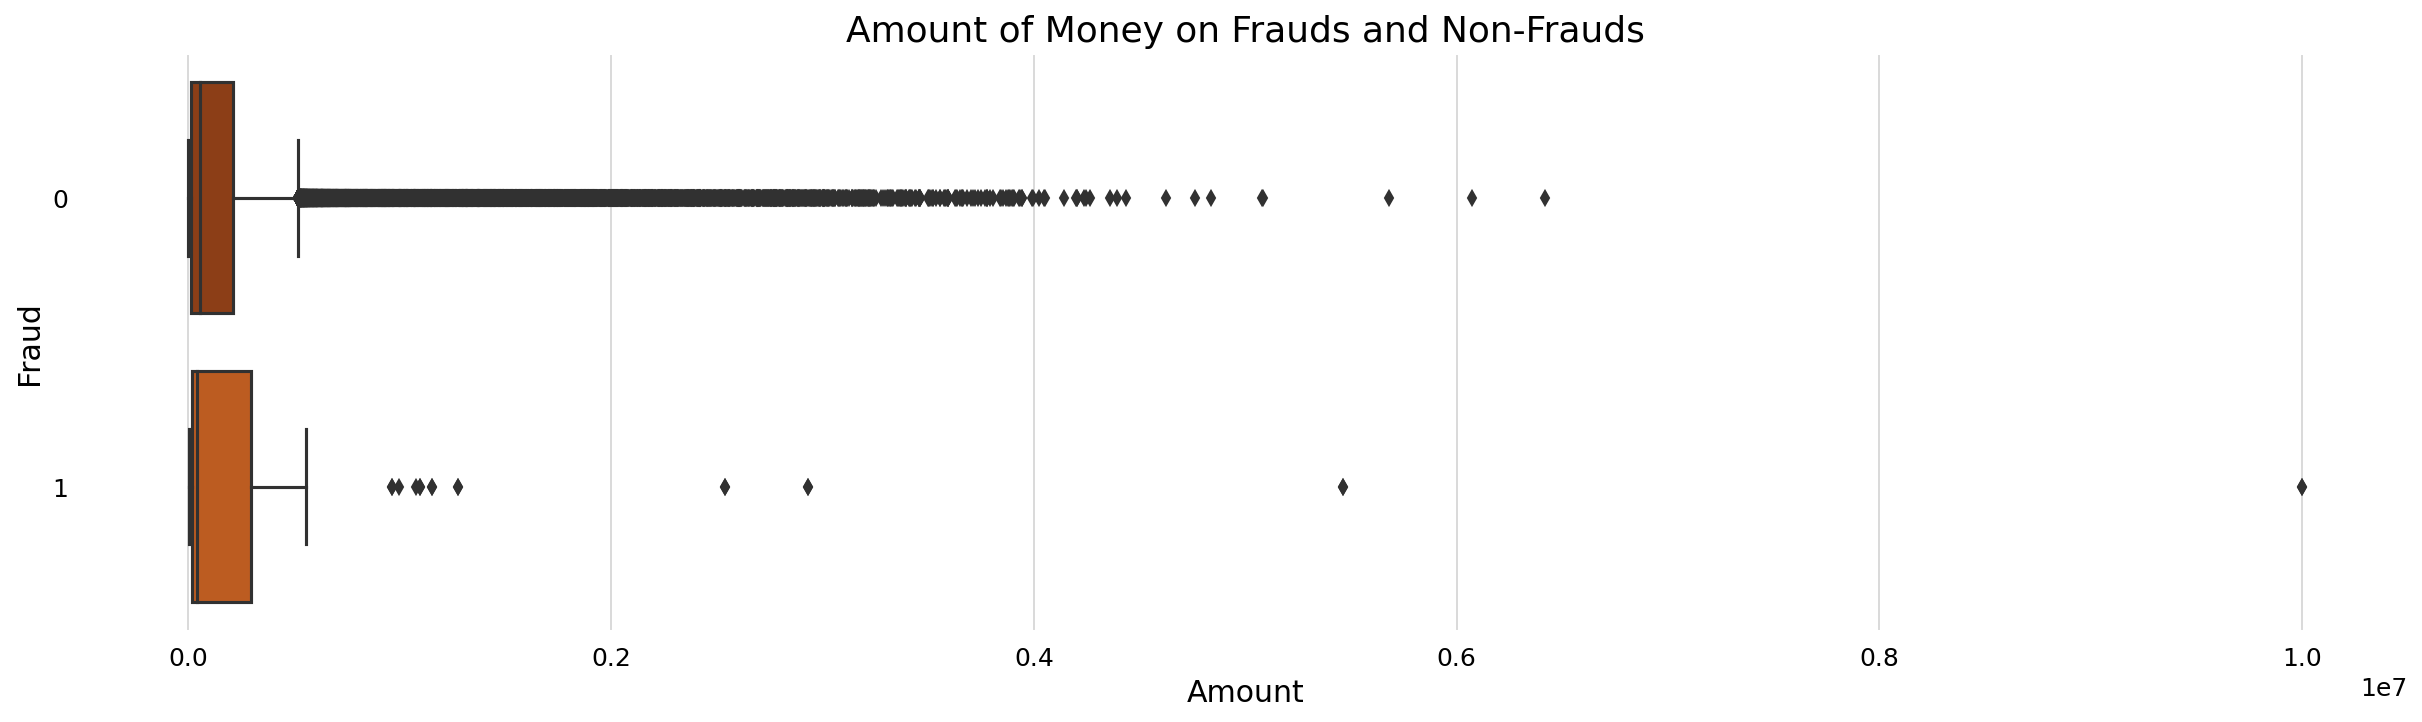

In [18]:
# Boxplot
sns.boxplot(data=df, x = 'amount', y = 'fraud', orient='h')
# Settings
set_image('Amount of Money on Frauds and Non-Frauds', 'Amount', 'Fraud')

### 3.6. Additional Information on Dataset

In [19]:
df.amount.max()

10000000.0

In [20]:
df['name_orig'].value_counts(ascending=False).head()

C1231006815    1
C358333738     1
C917141406     1
C1797964264    1
C59265825      1
Name: name_orig, dtype: int64

In [21]:
df['name_dest'].value_counts(ascending=False).head()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    70
C2083562754    66
Name: name_dest, dtype: int64

In [22]:
df['name_orig'].nunique()

101613

In [23]:
df['name_dest'].nunique()

52280

The origin of the transactions are all uniques, while the destination of the transactions are not.

## 4. Feature Engineering and Data Preparation

In [24]:
# Creating df1 to work with from now on
df1 = df.copy()

### 4.1. Dropping columns

In [25]:
# dropping flagged_fraud because all values are 0 
df1 = df1.drop('flagged_fraud', axis=1)

# dropping name_orig because all values are unique
df1 = df1.drop('name_orig', axis=1)

### 4.2. One-Hot Encoding

In [26]:
# One-Hot Encoding for the column type
df1 = pd.get_dummies(df1, columns=['type'])

In [27]:
# Renaming type columns
type_columns = {
    'type_CASH_IN':     'type_cash_in',
    'type_CASH_OUT':    'type_cash_out', 
    'type_DEBIT':       'type_debit', 
    'type_PAYMENT':     'type_payment', 
    'type_TRANSFER':    'type_transfer'
}

df1 = df1.rename(columns=type_columns)

### 4.3. Correlation Heatmap

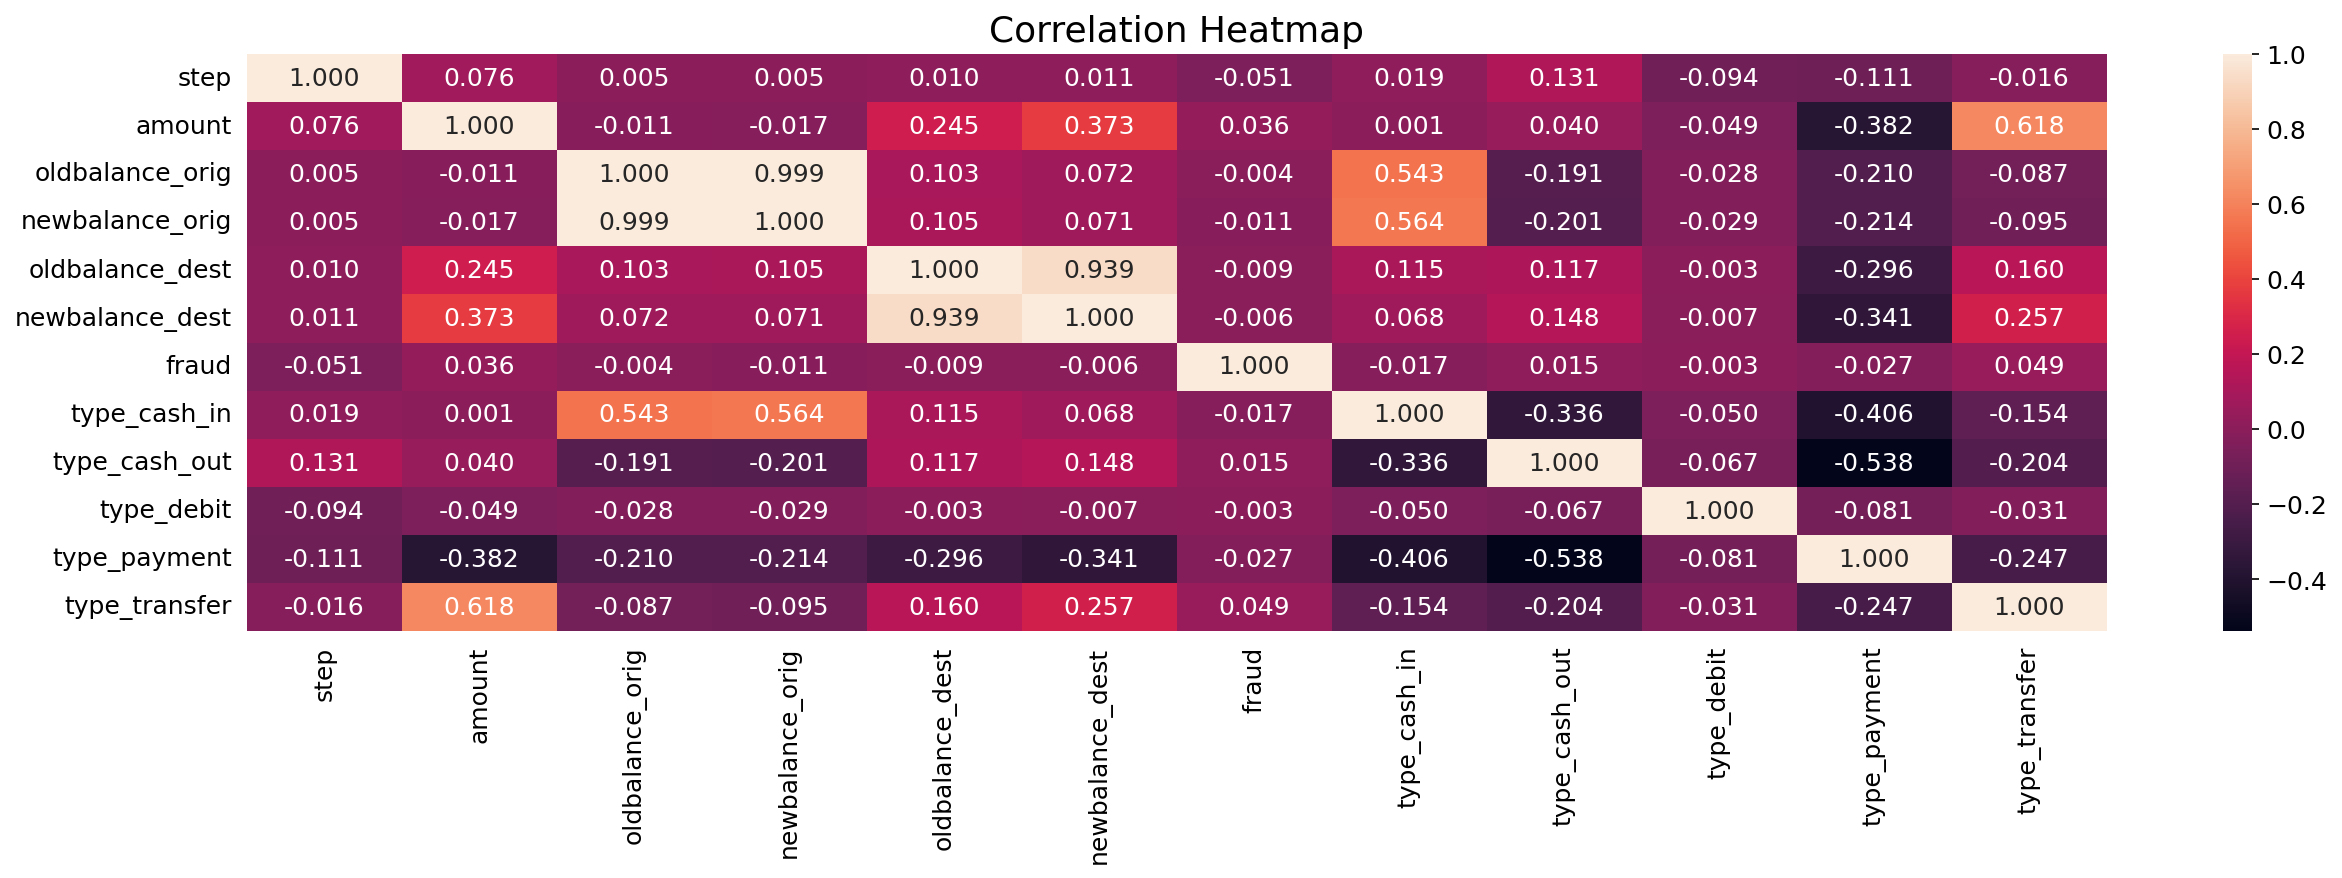

In [28]:
# Correlation Heatmap
sns.heatmap(df1.corr(), annot=True, fmt='.3f')

# Settings
set_image('Correlation Heatmap', None, None, 90)

### 4.4. Train Test Split

In [29]:
# Define X and y
X = df1.drop('fraud', axis=1)
y = df1['fraud']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4.5. Label Encoder

In [30]:
le = LabelEncoder()

X_train['name_dest'] = le.fit_transform(X_train['name_dest'])

X_test['name_dest'] = le.fit_transform(X_test['name_dest'])

### 4.6. Transformations

In [31]:
# Applying Robust Scaler
scaler = RobustScaler()

scaler_columns = ['amount', 'oldbalance_orig', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']

X_train[scaler_columns] = scaler.fit_transform(X_train[scaler_columns].values)

X_test[scaler_columns] = scaler.fit_transform(X_test[scaler_columns].values)

## 5. Machine Learning

### 5.1. Logistic Regression

Logistic Regression is a model that predicts the probability of an event. It means that applying it to the training data, it will use all the columns to predict the probability of fraud in the dataset.

In [32]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',   recall_score(y_test, y_pred)) 
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.9991339946465123
Precision: 1.0
Recall: 0.043478260869565216
F1 Score: 0.08333333333333333


As shown by the metrics, the model has a high Accuracy, but an extremely low Recall. It means that, even though the model classifies a lot of fraudulent transactions correctly, it does not classify all of them right, fraudulent or not. The low F1 Score confirms this.

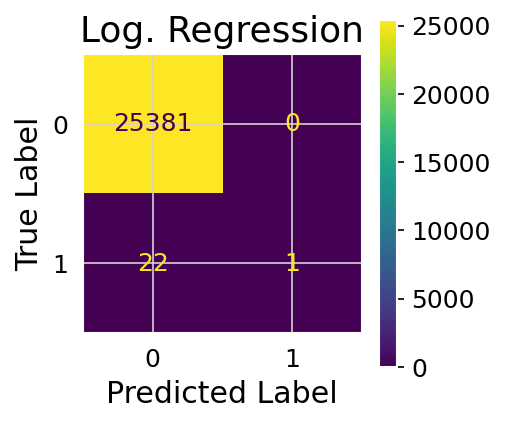

In [33]:
# Confusion Matrix
cm      = confusion_matrix(y_test, y_pred)
disp    = ConfusionMatrixDisplay(confusion_matrix=cm)

# Set the figure size
fig, ax = plt.subplots(figsize=(3,3))

# Plot the confusion matrix
disp.plot(ax=ax)

# Settings
set_image('Log. Regression', 'Predicted Label', 'True Label')

The Confusion Matrix plot confirms that the classes are unbalanced. By guessing all transactions as non-fraudulent, the model has a high Accuracy, but a low Recall.

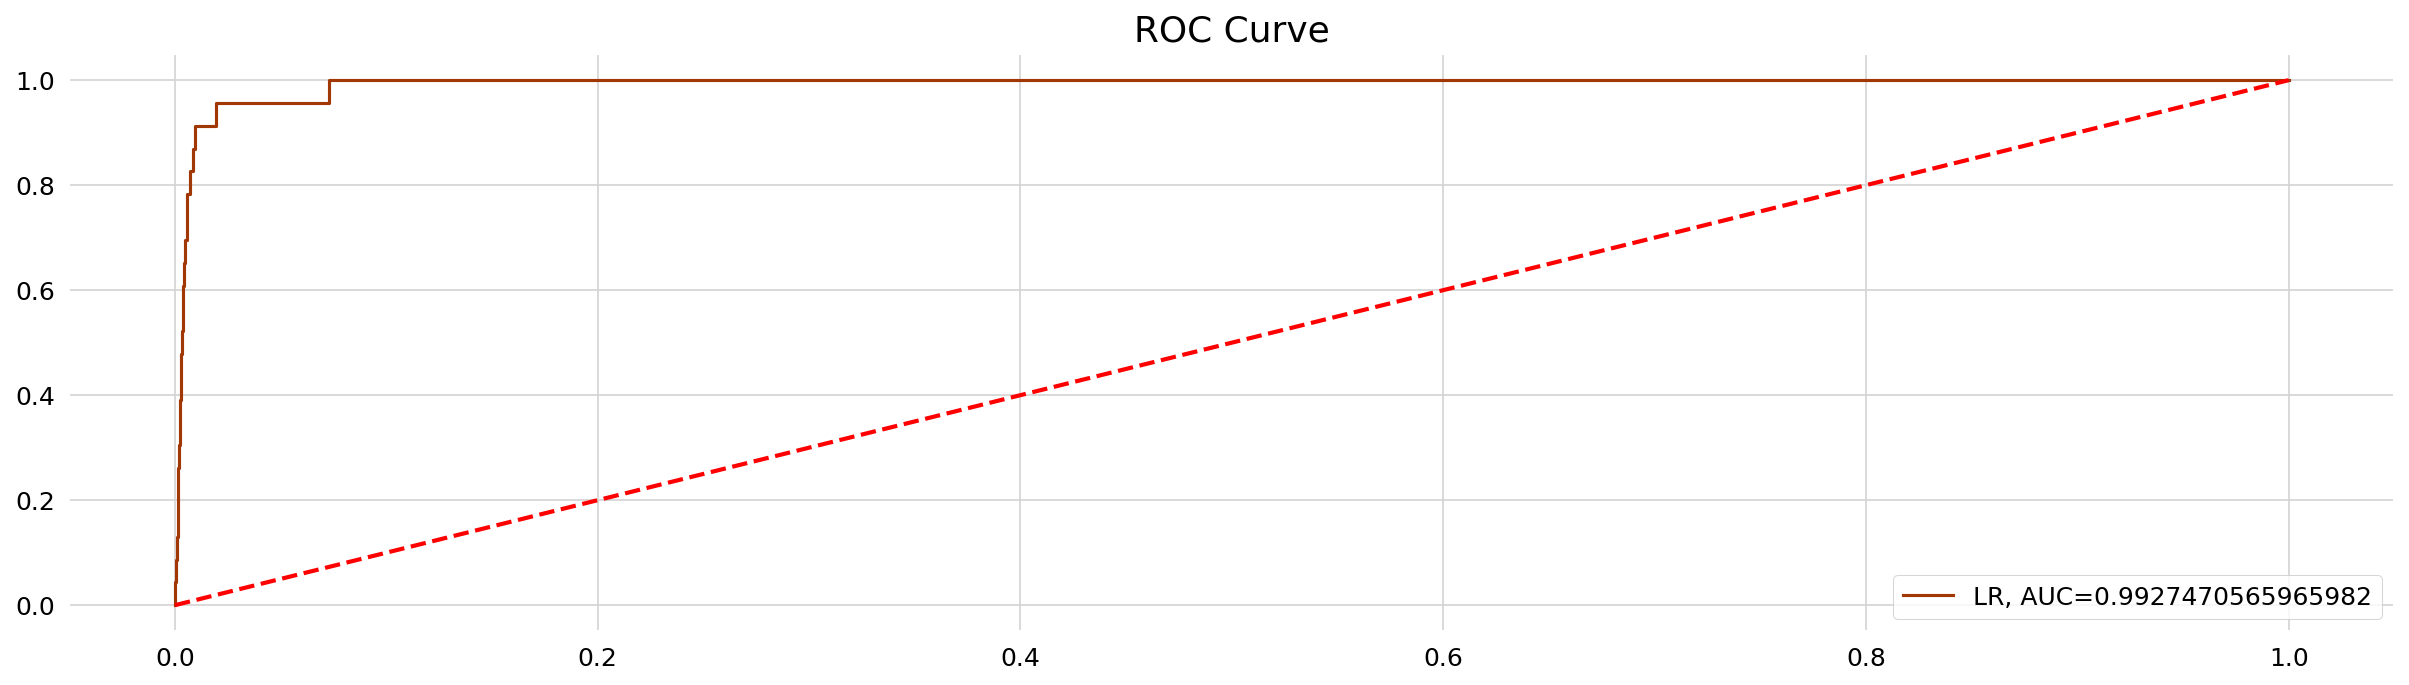

In [34]:
y_pred_proba    = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _     = roc_curve(y_test, y_pred_proba)
auc             = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Settings
set_image('ROC Curve', None, None)

In the Roc Curve the faster the curve approaches 1, the better. And the higher the AUC, the better. But it is noted that the rise of the curve is a little rude and squared.

### 5.2. Data Resampling

Increasing the number of instances in the minority class by duplicating or generating new instances.

In [35]:
# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [36]:
# Concatenate the resampled data
df_balanced = pd.concat([y_resampled, X_resampled], axis=1)
# Check the balance
df_balanced['fraud'].value_counts()

0    76116
1    76116
Name: fraud, dtype: int64

### 5.3. Resampled Logistic Regression

In [37]:
X = df_balanced.drop('fraud', axis=1)
y = df_balanced['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [38]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=12)

lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Metrics
print('Accuracy:',  accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',    recall_score(y_test, y_pred)) 
print('F1 Score:',  f1_score(y_test, y_pred))

Accuracy: 0.9570129801881339
Precision: 0.9619565217391305
Recall: 0.9514123102866779
F1 Score: 0.9566553624417127


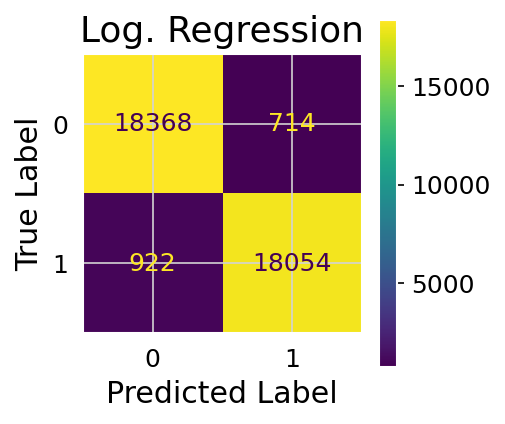

In [39]:
# Confusion Matrix
cm      = confusion_matrix(y_test, y_pred)
disp    = ConfusionMatrixDisplay(confusion_matrix=cm)

# Set the figure size
fig, ax = plt.subplots(figsize=(3,3))

# Plot the confusion matrix
disp.plot(ax=ax)

# Settings
set_image('Log. Regression', 'Predicted Label', 'True Label')

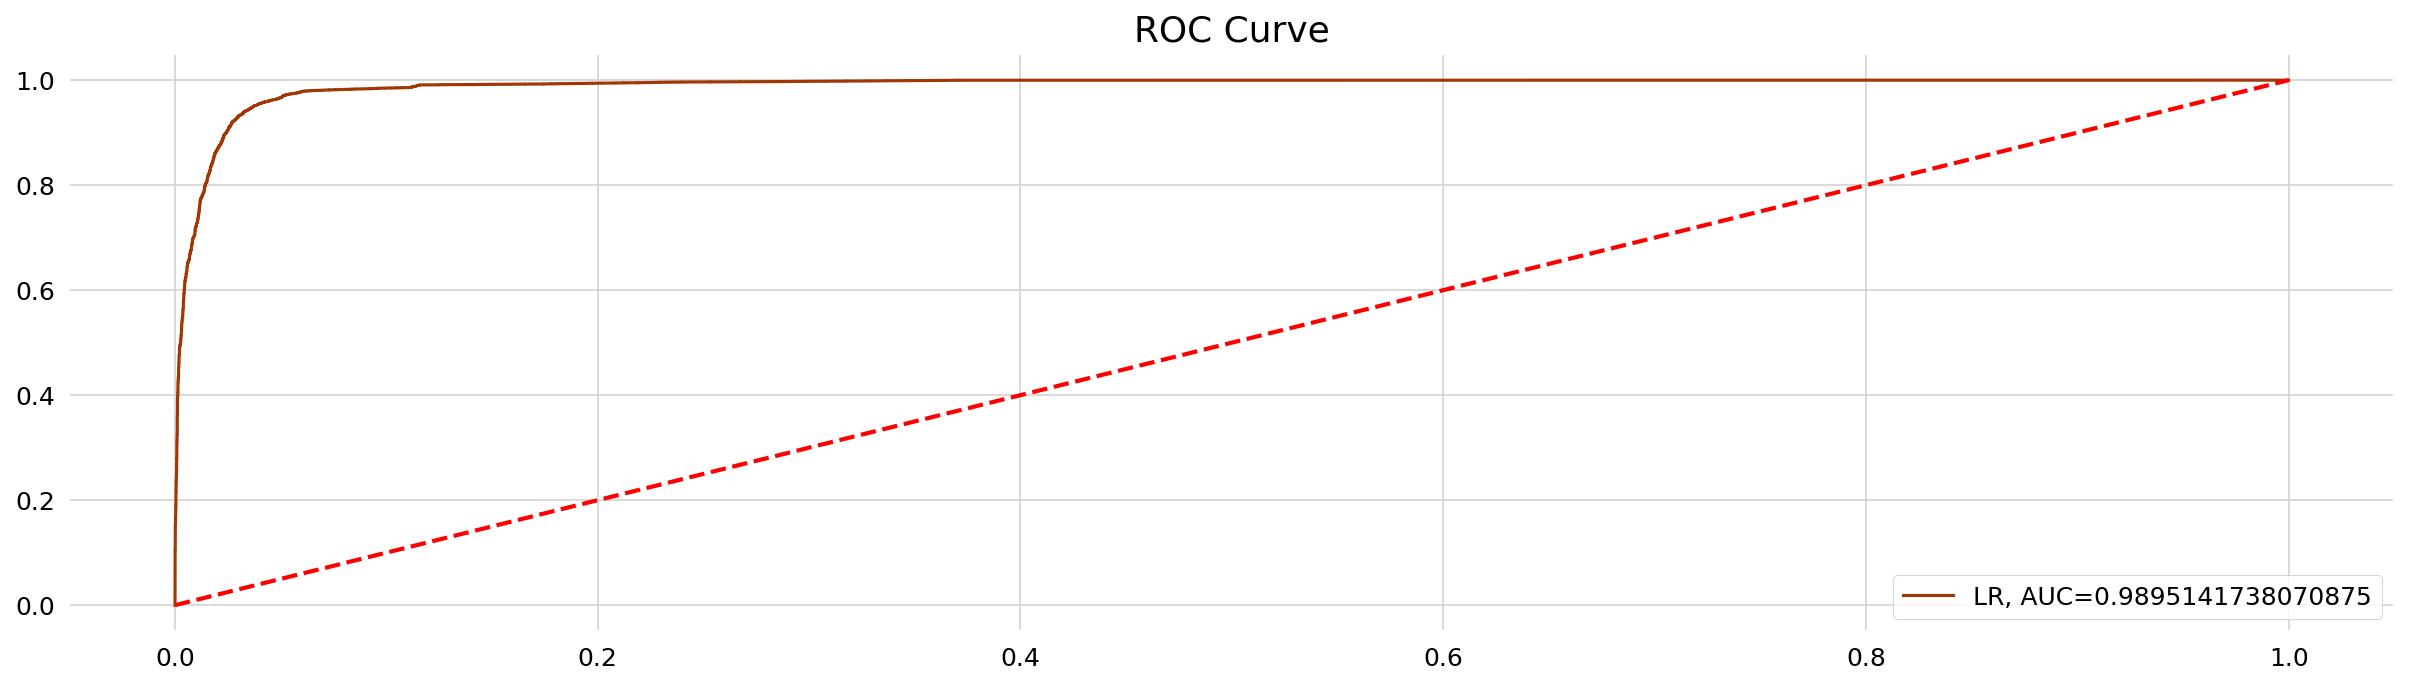

In [40]:
y_pred_proba    = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _     = roc_curve(y_test, y_pred_proba)
auc             = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Settings
set_image('ROC Curve', None, None)

The numbers on Recall and F1 Score are higher than before, the Confusion Matrix shows more balance and the ROC Curve is softer on the rise to 1.

### 5.4. Decision Tree Classifier

In [41]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=5,random_state=12)

# Fit
model = dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Metrics
print('Accuracy:',  accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',    recall_score(y_test, y_pred))
print('F1 Score:',  f1_score(y_test, y_pred))

Accuracy: 0.9598770297966261
Precision: 0.9653314843458318
Recall: 0.9537837268128162
F1 Score: 0.9595228628230617


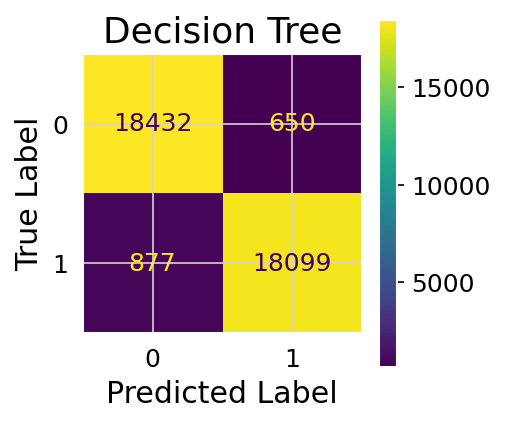

In [42]:
# Confusion Matrix
cm      = confusion_matrix(y_test, y_pred)
disp    = ConfusionMatrixDisplay(confusion_matrix=cm)

# Set the figure size
fig, ax = plt.subplots(figsize=(3,3))

# Plot the confusion matrix
disp.plot(ax=ax)

# Settings
set_image('Decision Tree', 'Predicted Label', 'True Label')

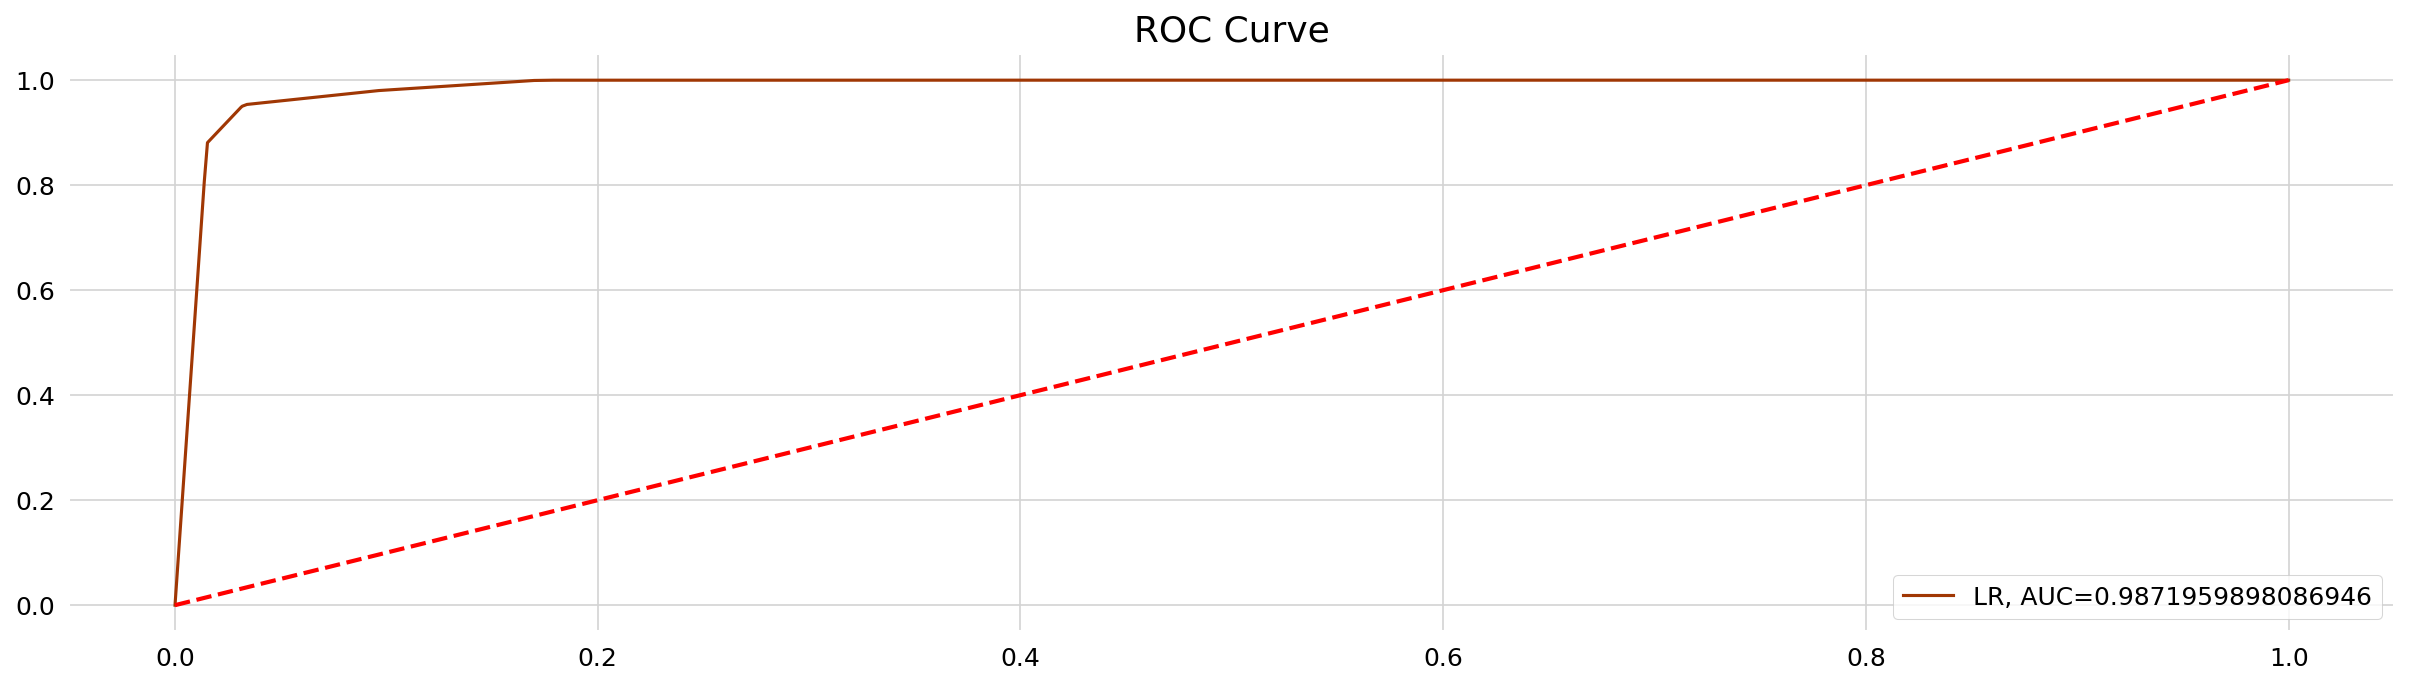

In [43]:
y_pred_proba    = dt.predict_proba(X_test)[::, 1]
fpr, tpr, _     = roc_curve(y_test, y_pred_proba)
auc             = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Settings
set_image('ROC Curve', None, None)

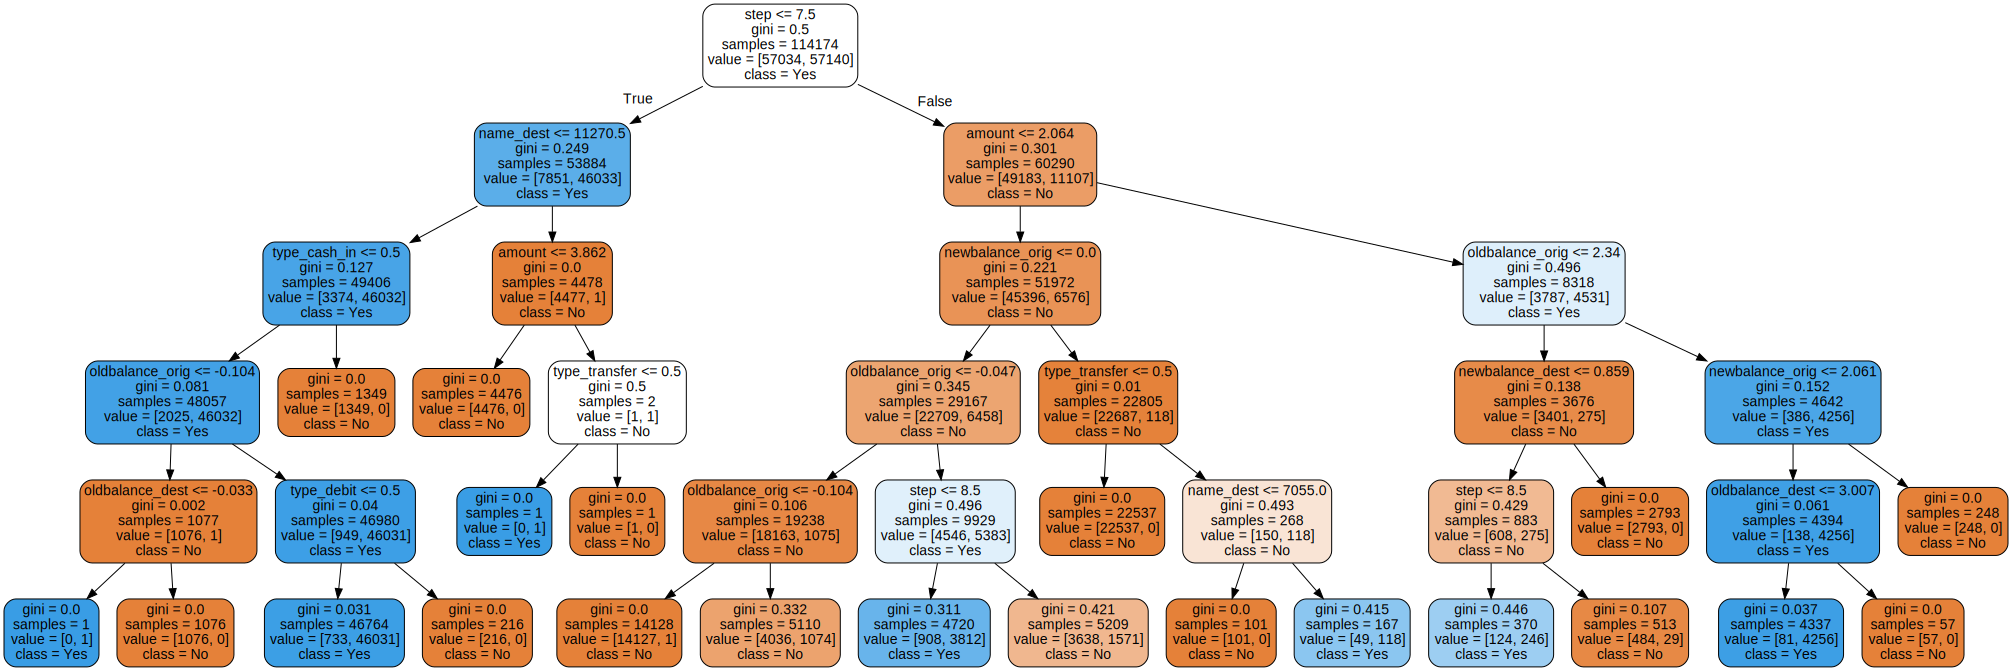

In [44]:
features    = X_train.columns

# Creating Graph
dot_data    = export_graphviz(dt, out_file=None, filled = True, rounded = True, feature_names = features, class_names = ['No', 'Yes'])
graph       = graphviz.Source(dot_data)

# Plotting
graph

### 5.5. Random Forest Classifier

In [45]:
# Random Forest
rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=12)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Metrics 
print('Accuracy:',  accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',    recall_score(y_test, y_pred))
print('F1 Score:',  f1_score(y_test, y_pred))

Accuracy: 0.9686793840979557
Precision: 0.9616343058872391
Recall: 0.9761277403035413
F1 Score: 0.9688268214864795


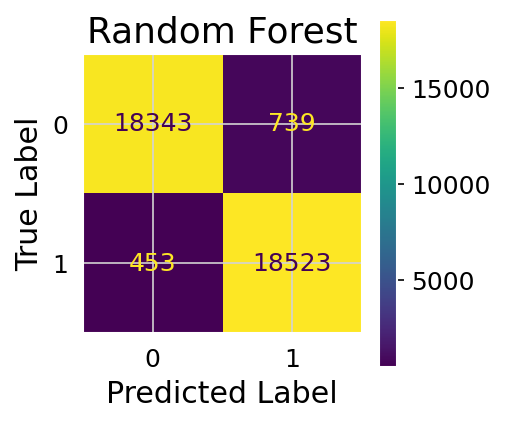

In [46]:
# Confusion Matrix
cm      = confusion_matrix(y_test, y_pred)
disp    = ConfusionMatrixDisplay(confusion_matrix=cm)

# Set the figure size
fig, ax = plt.subplots(figsize=(3,3))

# Plot the confusion matrix
disp.plot(ax=ax)

# Settings
set_image('Random Forest', 'Predicted Label', 'True Label')

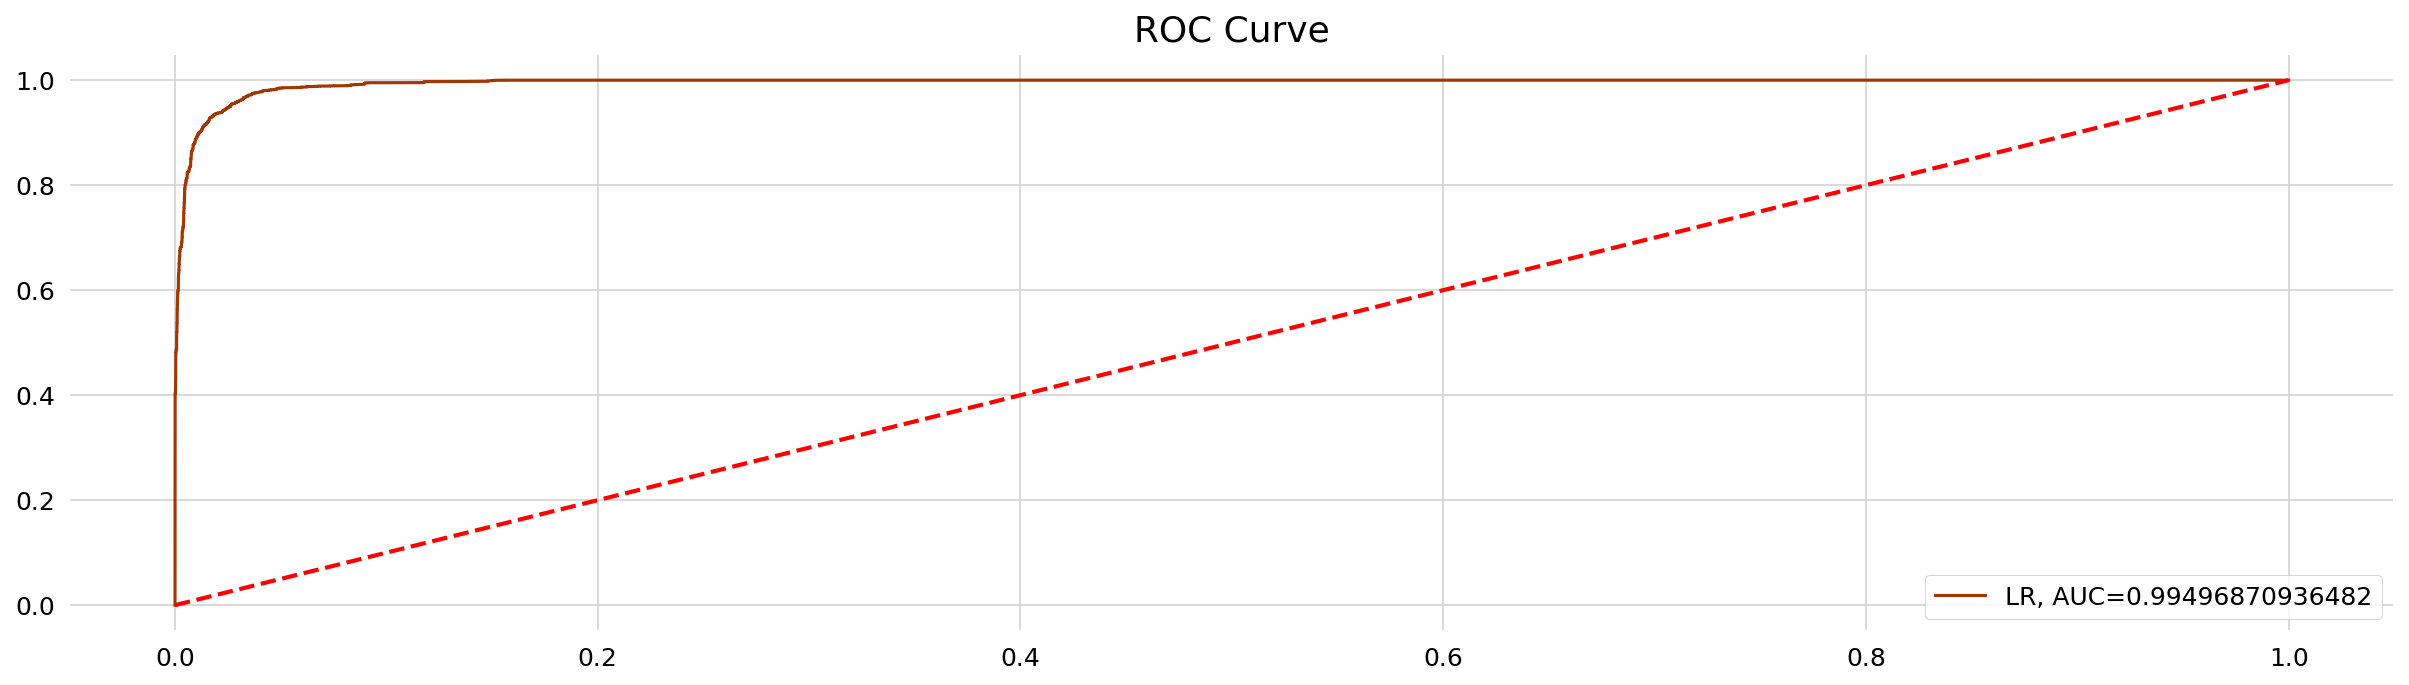

In [47]:
y_pred_proba    = rf.predict_proba(X_test)[::, 1]
fpr, tpr, _     = roc_curve(y_test, y_pred_proba)
auc             = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Settings
set_image('ROC Curve', None, None)

### 5.6. Machine Learning Conclusions

The best model is RandomForestClassifier

## 6. Hyperparameter Tuning

In [51]:
# Setting parameters
n_estimators        = np.arange(200, 900, step=100)
criterion           = ['gini', 'entropy']
max_features        = ['auto', 'sqrt', 'log2']
max_depth           = list(np.arange(2, 7, step=1))
min_samples_split   = np.arange(2, 10, step=2)
min_samples_leaf    = [1, 2, 4]
bootstrap           = [True, False]

# Grid of parameters
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}

# Model
rf = RandomForestClassifier(random_state=12)

# Randomized Search
random_cv = RandomizedSearchCV(
    rf, param_grid, n_iter=6, cv=4, scoring='recall', n_jobs=-1, random_state = 12)

# Fit
rcv = random_cv.fit(X_train, y_train)

In [52]:
# Best parameters
rcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'gini',
 'bootstrap': False}

In [53]:
# Predict
y_pred = rcv.predict(X_test)

# Metrics
print('Accuracy:',  accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:',    recall_score(y_test, y_pred))
print('F1 Score:',  f1_score(y_test, y_pred))

Accuracy: 0.974302380577014
Precision: 0.9662211169826961
Recall: 0.9828204047217538
F1 Score: 0.974450075761534


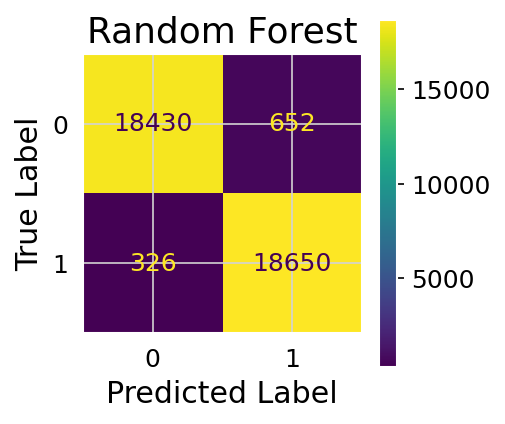

In [54]:
# Confusion Matrix
cm      = confusion_matrix(y_test, y_pred)
disp    = ConfusionMatrixDisplay(confusion_matrix=cm)

# Set the figure size
fig, ax = plt.subplots(figsize=(3,3))

# Plot the confusion matrix
disp.plot(ax=ax)

# Settings
set_image('Random Forest', 'Predicted Label', 'True Label')

## 7. Conclusion

Recall is the metric that needed to be improved. We don't want to make the customer unhappy and cause them to receive a notification that they are committing a fraud when they are not, but it is much more dangerous to miss a fraud than to allow unwanted warnings. Therefore, the model with the best Recall is chosen where it is equal to 0.9828 and the best F1 Score is equal to 0.9744.

### 7.1. Project Final Report

**Problem definition:** Fraud detection. Constructing a mechanism for the financial institution using data science techniques to improve the security infrastructure and elevate the precision of decision-making processes.

**Data collection:** Kaggle dataset download.

**Data cleaning and processing:** The dataset didn't have any missing values, but the name of the columns were changed to avoid confusion. 

**Exploratory Data Analysis:** This section was used to clarify some information about the dataset, like the the distribution of step (hours) on transactions, the type of payments distribution and how they were related to the amount of money. Using visual analysis we could see that the hour 9 had the most transactions and the type "transfer" was the most used. Unfortunately, the fraud data was so small that the distribution could not be clearly seen.

**Data preparation:** Some columns were dropped because they were not useful for the model, like flagged_fraud with all values equal to zero and name_orig because all values were unique. **One-Hot Encoding** was applied to the type of payment, **Label Encoder** for the transaction recipient and **Robust Scaler** for the columns in monetary values. 

**Data modeling:** By applying **Logistic Regression**, the model returned a high *Accuracy* result and small *Recall*, confirming the model's unbalanced data that was a problem during EDA. Then, the data was resampled using SMOTE (Synthetic Minority Over-sampling Technique). The next step was to model the data using the Logistic Regression again, **Decision Tree Classifier** and **Random Forest Classifier**. All the models were evaluated by the metrics: *Accuracy*, *Precision*, *Recall* and *F1 Score*, plotting the *Confusion Matrix* and the *ROC curve* in each one.

**Data interpretation:** After Resampling the data the models performed well, with good results for Recall and F1 Score. By the end of it, we could see that the Random Forest Classifier was the best model.

**Applying improvements:** The hyperparameter tuning section is to improve the chosen model. A Grid of parameters were used to find the best results for the model using **RandomizedSearchCV**.

**Definition of the best model:** The best parameters were used to run the model again and returned the following results: Accuracy: 0.9743, Precision: 0.9662, Recall: 0.9828 and F1 Score: 0.9744. The high Recall result gives confidence to follow with this model throug the next steps of the project for the financial institution, identifying a fraud when needed.
